# Neural network classification with Pytorch
Classification is a problems of predict wherether something is one thing or another. (there can be multiple things as option)

## 1. Make some data

In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

#make 1000 circle
n_sample = 1000
data, label = make_circles(n_sample,
                          noise = 0.03,
                          random_state = 42)

In [4]:
print(len(data), len(label))
print(f"first 5 sample of data: \n {data[:5]}")
print(f"first 5 sample of label: \n {label[:5]}")

1000 1000
first 5 sample of data: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first 5 sample of label: 
 [1 1 1 1 0]


In [5]:
import pandas as pd
data_df = pd.DataFrame({"X1": data[:,0],
                      "X2": data[:,1],
                      "label": label})
data_df.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


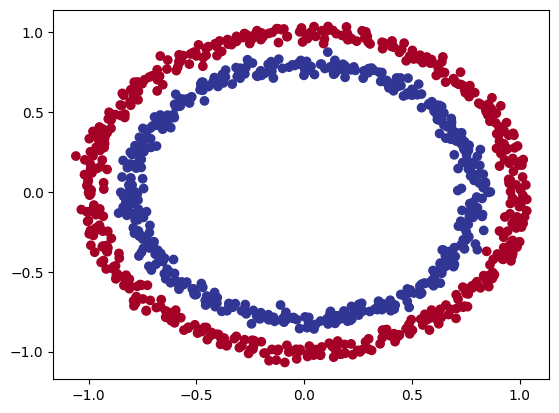

In [6]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(x=data[:,0],
           y= data[:,1],
           c=label,
           cmap = plt.cm.RdYlBu)

### 1.1 Check input and output shape

In [7]:
data.shape, label.shape

((1000, 2), (1000,))

In [8]:
#view the first example of features and label
data_sample = data[0]
label_sample = label[0]

print(f"value for one sample of data: {data_sample}\n value of one sample of label: {label_sample}")
print(f"shape of one sample of data: {data_sample.shape}\n shape of one sample of label: {label_sample.shape}")

value for one sample of data: [0.75424625 0.23148074]
 value of one sample of label: 1
shape of one sample of data: (2,)
 shape of one sample of label: ()


### 1.2 turn data into tensor and create train test split

In [9]:
import torch
from torch import nn

d:\work\personal-projects\pytorch-nlp\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
type(data)

numpy.ndarray

In [11]:
###turn data into tensor
data = torch.from_numpy(data).type(torch.float32)
label = torch.from_numpy(label).type(torch.float)

In [12]:
type(data), type(label)

(torch.Tensor, torch.Tensor)

In [13]:
data.dtype, label.dtype

(torch.float32, torch.float32)

In [14]:
data[:5], label[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
###split data into training and test splt
from sklearn.model_selection import train_test_split

train_data,test_data,train_label,test_label = train_test_split(data,label,
                                                              test_size = 0.2,
                                                              random_state =42)

In [16]:
print(f"length of trainning data set: {len(train_data),len(train_label)}")
print(f"length of testing data set: {len(test_data), len(test_label)}")

length of trainning data set: (800, 800)
length of testing data set: (200, 200)


### 2.Building model

What we will do:
1. Setup device agnostic code so our model code will run on accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [17]:
#import library
import torch
from torch import nn

### 2.1 create device agnostic code

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### 2.2 Construct a model

1. Create a subclasses `nn.Module` (almost all model in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Define a `forward()` method that outlines the forwar pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [19]:
## 1. construct a model that subclass of nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        #create 2 linear layer
        self.layer_1 = nn.Linear(in_features = 2, #taking 2 features from input and up scale to 50 features
                                out_features = 64)
        self.layer_2 = nn.Linear(in_features = 64,  #taking 2 features from previous layer and return output of a single number
                                out_features = 1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) #x -> layer_1 -> layer_2 -> output

#4 instantiate an instance of our model class and send it to the targer device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=1, bias=True)
)

In [20]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [21]:
###Let replicate the model above with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features =2,
             out_features = 64),
    nn.Linear(in_features = 64,
             out_features = 1),
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=64, bias=True)
  (1): Linear(in_features=64, out_features=1, bias=True)
)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1490, -0.5094],
                      [-0.6916, -0.2357],
                      [-0.1218, -0.6033],
                      [ 0.6202,  0.0357],
                      [ 0.1699,  0.1573],
                      [-0.1188, -0.6016],
                      [-0.3199, -0.6228],
                      [-0.4472, -0.4583],
                      [-0.3987, -0.2683],
                      [-0.2382, -0.3688],
                      [-0.1205, -0.2925],
                      [ 0.2679, -0.1910],
                      [-0.4454,  0.0478],
                      [ 0.2788, -0.5522],
                      [-0.6696, -0.6976],
                      [-0.3486, -0.4001],
                      [ 0.4193,  0.2186],
                      [ 0.1603, -0.2916],
                      [ 0.3563, -0.1536],
                      [ 0.5509, -0.6217],
                      [-0.5230,  0.2819],
                      [ 0.4297, -0.2938],
                      [-0.0757,  0.3454],
        

In [23]:
##make prediction
with torch.inference_mode():
    untrained_preds = model_0(test_data.to(device))

print(f"Lenghht of the prediction {len(untrained_preds)}, shape of the prediciton {untrained_preds.shape}")
print(f"Lenghht of the test sampe {len(test_data)}, shape of the prediciton {test_data.shape}")

Lenghht of the prediction 200, shape of the prediciton torch.Size([200, 1])
Lenghht of the test sampe 200, shape of the prediciton torch.Size([200, 2])


In [24]:
print(f"First 10 predictions {torch.round(untrained_preds[:10])}")
print(f"First 10 labels {test_label[:10]}")

First 10 predictions tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')
First 10 labels tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.3 Pick loss function and optimizer

For binary classification problems, Pytorch have 2 loss functions (and more) that are commonly uses:
BCELoss() (Binary Cross Entropy Loss) and BCEWithLogitsLoss()

BCEWithLogitsLoss() is BCELoss() combine with sigmod() layers in one single class. This version is more numerically stable than use 2 layer speratelly

In [25]:
#setup loss function
loss_func = nn.BCEWithLogitsLoss()
#setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                       lr =0.1)

In [26]:
#calculate the accuracy - of out 100 samples, how many the model predict right
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc

### 2.4 Create training and test loop
traing model:
1. Forward pass
2. Calculate loss
3. Optimizer zero_grad()
4. Loss backward() (backprobagation)
5. Optimizer step() (gradient decent)

**raw logits** -> **prediction probabilities** -> **prediction labels**

* Our model outputs are going to be **raw logits**

* We can converts these **raw logits** into **prediction probabilities** by passing them to activation function (e.g. `sigmoid` for binary classification or `softmax` for multiclass classification)

* Then converts our **prediction probabilities** to **prediction labels** by either rounding them or taking the `argmax()`

In [27]:
#put data on the device
train_data = train_data.to(device)
train_label = train_label.to(device)
test_data = test_data.to(device)
test_label = test_label.to(device)

In [28]:
## traing model
epochs = 150
epoch_count = []
loss_count = []
acc_count = []
val_loss_count = []
val_acc_count = []

torch.manual_seed(42)
for epoch in range(epochs):
    ### TRAINING
    model_0.train()
    ##1. forward pass:
    y_logits = model_0(train_data).squeeze()
    y_preds_probs = torch.sigmoid(y_logits)
    y_preds = torch.round(y_preds_probs)
    ##2. calculate loss
    loss = loss_func(y_logits, train_label)
    accuracy = accuracy_fn(train_label, y_preds)
    ##3.optimizer zero grad
    optimizer.zero_grad()
    ##4. loss backward
    loss.backward()
    ##5. optimizer step
    optimizer.step()
    
    ### EVALUATING
    model_0.eval()
    with torch.inference_mode():
        eval_logits = model_0(test_data).squeeze()
        eval_preds_probs = torch.sigmoid(eval_logits)
        eval_preds = torch.round(eval_preds_probs)
        val_loss = loss_func(eval_logits, test_label)
        val_acc = accuracy_fn(test_label, eval_preds)
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss: {loss:.5f} | accuracy: {accuracy:.2f} | val_loss: {val_loss:.5f} | val_accuracy: {val_acc:.2f}")
        epoch_count.append(epoch)
        loss_count.append(loss)
        acc_count.append(accuracy)
        val_loss_count.append(val_loss)
        val_acc_count.append(val_acc)

epoch: 0 | loss: 0.69779 | accuracy: 50.00 | val_loss: 0.69744 | val_accuracy: 50.00
epoch: 10 | loss: 0.69307 | accuracy: 50.25 | val_loss: 0.69472 | val_accuracy: 49.00
epoch: 20 | loss: 0.69299 | accuracy: 50.88 | val_loss: 0.69467 | val_accuracy: 46.00
epoch: 30 | loss: 0.69298 | accuracy: 51.50 | val_loss: 0.69467 | val_accuracy: 45.50
epoch: 40 | loss: 0.69298 | accuracy: 51.25 | val_loss: 0.69468 | val_accuracy: 45.50
epoch: 50 | loss: 0.69298 | accuracy: 51.25 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 60 | loss: 0.69298 | accuracy: 51.12 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 70 | loss: 0.69298 | accuracy: 51.12 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 80 | loss: 0.69298 | accuracy: 51.00 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 90 | loss: 0.69298 | accuracy: 51.00 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 100 | loss: 0.69298 | accuracy: 51.00 | val_loss: 0.69468 | val_accuracy: 46.00
epoch: 110 | loss: 0.69298 | accuracy: 51.00 | val_los

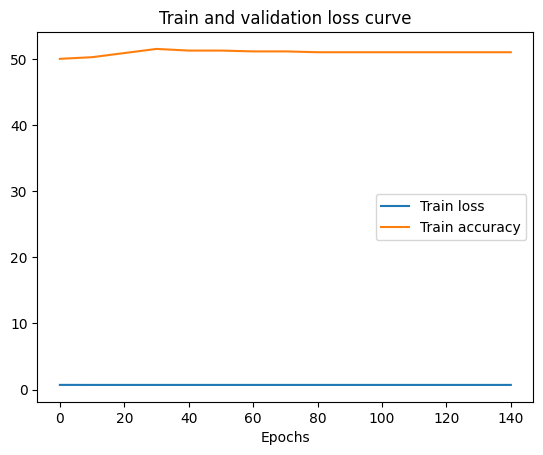

In [29]:
import numpy as np
### plot training loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_count).cpu().numpy()), label = 'Train loss')
plt.plot(epoch_count, acc_count, label = 'Train accuracy')
plt.title('Train and validation loss curve')
plt.xlabel('Epochs')
plt.legend();

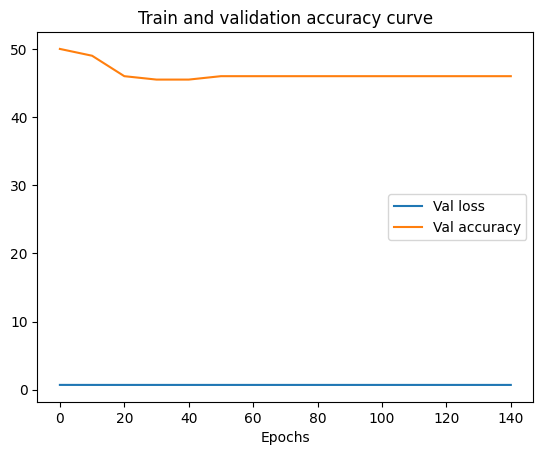

In [30]:
### plot training accuracy curves
plt.plot(epoch_count, np.array(torch.tensor(val_loss_count).cpu().numpy()), label = 'Val loss')
plt.plot(epoch_count, val_acc_count, label = 'Val accuracy')
plt.title('Train and validation accuracy curve')
plt.xlabel('Epochs')
plt.legend();

### 3.Make prediction and evaluate model


In [31]:
import requests
from pathlib import Path

#download helper function from Learn Pytorch repo (if it's not already downlaoded)
if Path('helper_functions.py').is_file():
    print("File already exist, skipped download")
else:
    print("Download helper_functions.py")
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

File already exist, skipped download


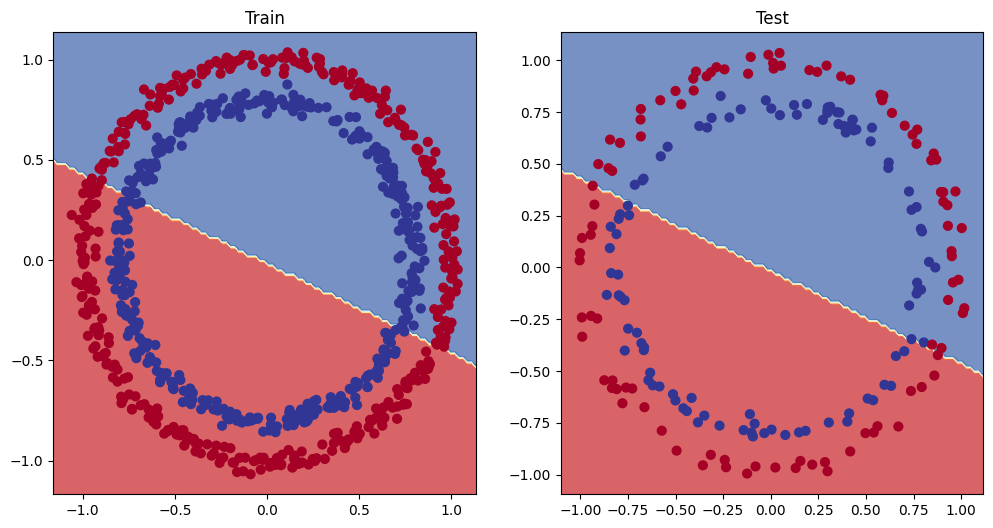

In [32]:
##plot the decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,train_data,train_label)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,test_data, test_label)

### 4.Improving a model
* Add more layers - give the model more chances to learn about the patterns in the data
* Add more hidden units
* Fit for longer
* Change the activation functions
* Change the learning rate
* Change the loss function

These option is from model's perspective because they deal directly with the model, rather than the data.
Because these values can be change by user, they are called **hyperparameters**

Let's improve the model by:
* increase the node from 64 -> 128
* increase the number of layers from 2 -> 3
* increase the number of epochs from 100 -> 300

* **important**: adding non-linear layer (ReLU)

In [67]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features =2,
                                out_features = 128)
        self.layer_2 = nn.Linear(in_features =128,
                                out_features = 128)
        self.layer_3= nn.Linear(in_features =128,
                                out_features = 1)
        self.relu = nn.ReLU()
    def forward(self, x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x))))) # this way of writing operation leverages speed ups where possible behind the scence

In [68]:
model_1 = CircleModelV1()
model_1.to(device)

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
)

In [69]:
#create loss functionc
loss_fn_1 = nn.BCEWithLogitsLoss()
#create optimizer
optimizer_1 = torch.optim.SGD(params= model_1.parameters(),
                             lr = 0.05)

In [70]:
#put data on the device
train_data, train_label = train_data.to(device), train_label.to(device)
test_data, test_label = test_data.to(device), test_label.to(device)

In [71]:
## traing model
epochs = 300
epoch_count = []
loss_count = []
acc_count = []
val_loss_count = []
val_acc_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)

for epoch in range(epochs):
    ### TRAINING
    model_1.train()
    ##1. forward pass:
    y_logits = model_1(train_data).squeeze()
    y_preds_probs = torch.sigmoid(y_logits)
    y_preds = torch.round(y_preds_probs)
    ##2. calculate loss
    loss = loss_fn_1(y_logits, train_label)
    accuracy = accuracy_fn(train_label, y_preds)
    ##3.optimizer zero grad
    optimizer_1.zero_grad()
    ##4. loss backward
    loss.backward()
    ##5. optimizer step
    optimizer_1.step()
    
    ### EVALUATING
    model_1.eval()
    with torch.inference_mode():
        eval_logits = model_1(test_data).squeeze()
        eval_preds_probs = torch.sigmoid(eval_logits)
        eval_preds = torch.round(eval_preds_probs)
        val_loss = loss_fn_1(eval_logits, test_label)
        val_acc = accuracy_fn(test_label, eval_preds)
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss: {loss:.5f} | accuracy: {accuracy:.2f} | val_loss: {val_loss:.5f} | val_accuracy: {val_acc:.2f}")
        epoch_count.append(epoch)
        loss_count.append(loss)
        acc_count.append(accuracy)
        val_loss_count.append(val_loss)
        val_acc_count.append(val_acc)

epoch: 0 | loss: 0.69356 | accuracy: 50.00 | val_loss: 0.69449 | val_accuracy: 50.00
epoch: 10 | loss: 0.69188 | accuracy: 46.62 | val_loss: 0.69303 | val_accuracy: 46.50
epoch: 20 | loss: 0.69053 | accuracy: 47.38 | val_loss: 0.69191 | val_accuracy: 53.50
epoch: 30 | loss: 0.68940 | accuracy: 50.62 | val_loss: 0.69097 | val_accuracy: 57.50
epoch: 40 | loss: 0.68835 | accuracy: 54.87 | val_loss: 0.69011 | val_accuracy: 60.00
epoch: 50 | loss: 0.68729 | accuracy: 59.38 | val_loss: 0.68926 | val_accuracy: 60.50
epoch: 60 | loss: 0.68622 | accuracy: 61.75 | val_loss: 0.68841 | val_accuracy: 61.50
epoch: 70 | loss: 0.68519 | accuracy: 63.62 | val_loss: 0.68758 | val_accuracy: 63.00
epoch: 80 | loss: 0.68414 | accuracy: 66.88 | val_loss: 0.68671 | val_accuracy: 66.00
epoch: 90 | loss: 0.68307 | accuracy: 69.25 | val_loss: 0.68583 | val_accuracy: 70.00
epoch: 100 | loss: 0.68199 | accuracy: 71.38 | val_loss: 0.68493 | val_accuracy: 70.50
epoch: 110 | loss: 0.68079 | accuracy: 72.38 | val_los

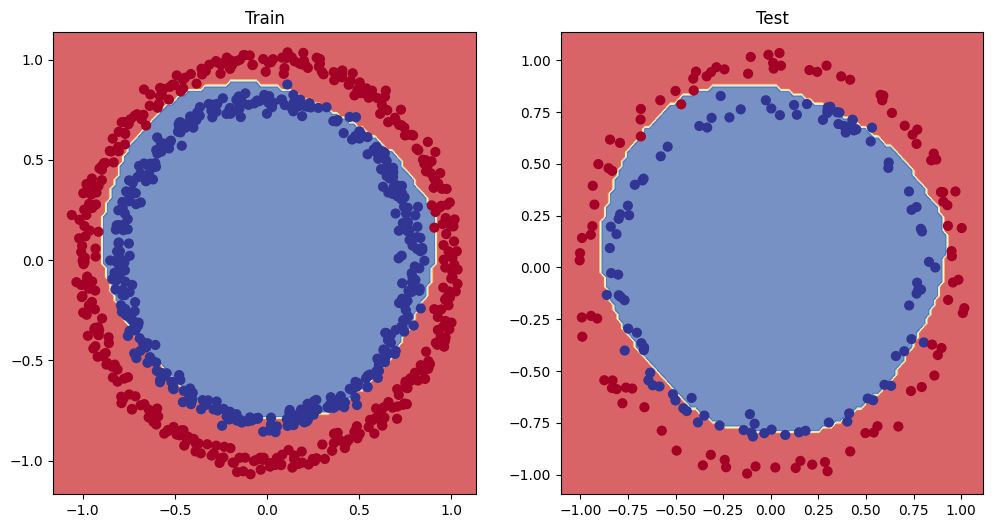

In [75]:
### Evaluate model
##plot the decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,train_data,train_label)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,test_data, test_label)

### 5.Replicate non-linear activation function
Neural networks, rather than us telling the model what to learn, we give it tools to discover the patterns in data and try to figure out the patterns on its own

And these tools are linear and non-linear functions.

In [77]:
#create a tensor
A = torch.arange(-10,10,1, dtype= torch.float32)
A.dtype

torch.float32

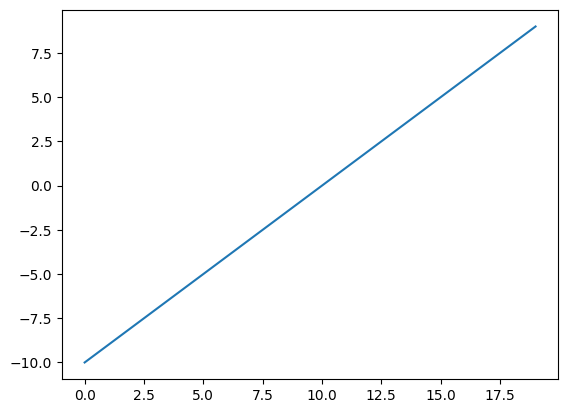

In [78]:
#visual the data
plt.plot(A)

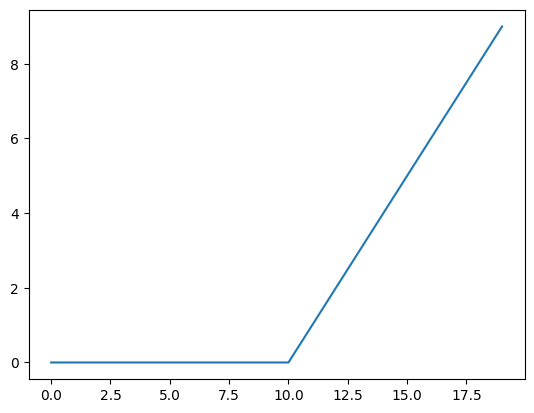

In [81]:
plt.plot(torch.relu(A));

In [84]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

In [86]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [85]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

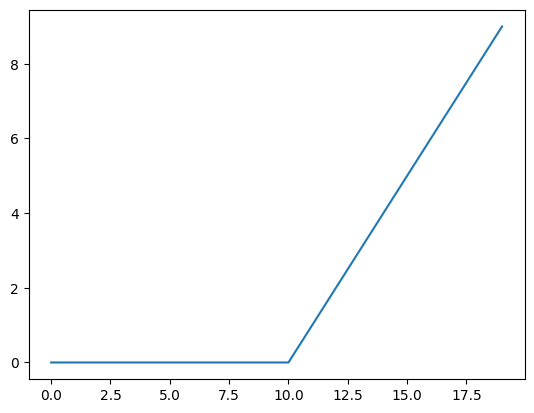

In [87]:
plt.plot(relu(A))

In [92]:
def sigmoid(x: torch.Tensor) ->torch.Tensor:
    return 1/(1 + torch.exp(-x))

In [90]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [93]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

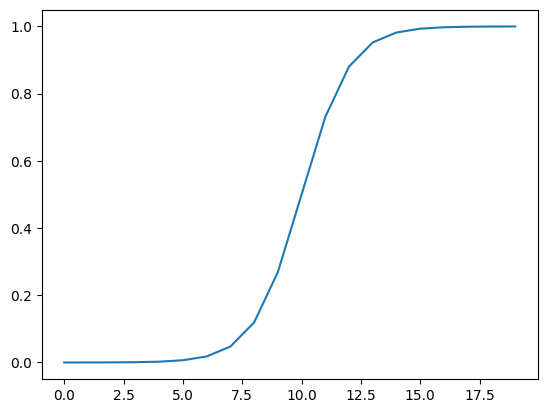

In [94]:
plt.plot(sigmoid(A))

### 6. Putting all together with multiclass classification problems

* binary classification: one thing or another
* multiclass classification: more than one things or another

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

d:\work\personal-projects\pytorch-nlp\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


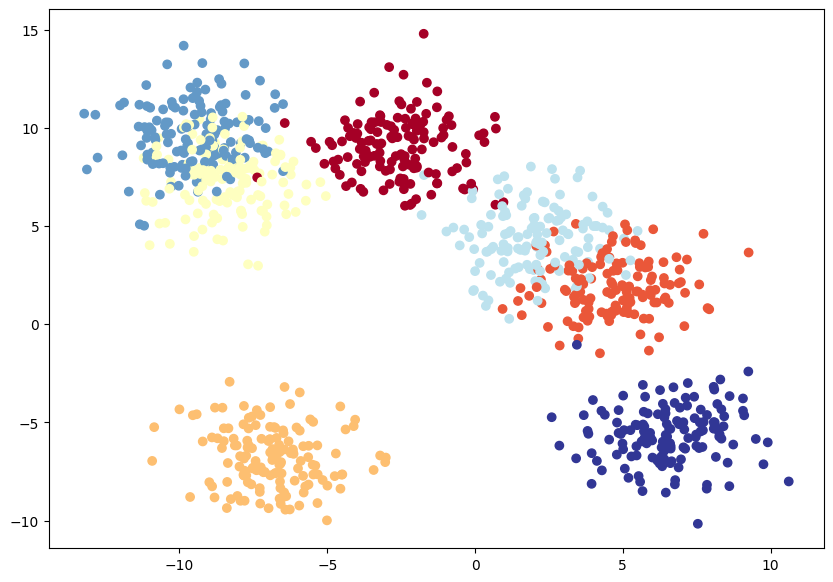

In [45]:
#set hyperparameters
NUMBER_OF_CLASSES = 7
NUMBER_OF_FEATURES = 2
RANDOM_SEED = 42

#create multiple class data
x_blob, y_blob = make_blobs(n_samples = 1000,
                           n_features = NUMBER_OF_FEATURES,
                           centers = NUMBER_OF_CLASSES,
                           cluster_std = 1.5, #give the cluster a little shake up
                           random_state = RANDOM_SEED)
#turn data into tensor
x_blob = torch.from_numpy(x_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
#split train and test
blob_train_data, blob_test_data, blob_train_label, blob_test_label = train_test_split(x_blob, y_blob,
                                                                 test_size = 0.8,
                                                                 random_state= RANDOM_SEED)
#visualize data
plt.figure(figsize=(10,7))
plt.scatter(x_blob[:, 0],x_blob[:, 1], c= y_blob, cmap=plt.cm.RdYlBu);

### 6.1 building device agnostic code

In [65]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [66]:
##setting data to device
blob_train_data, blob_train_label = blob_train_data.to(device), blob_train_label.to(device)
blob_test_data, blob_test_label = blob_test_data.to(device), blob_test_label.to(device)

### 6.2 building model

In [67]:
class MultiClassModelV0(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features = input_features, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = hidden_units),
            nn.ReLU(),
            nn.Linear(in_features = hidden_units, out_features = output_features)
        )
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)

In [68]:
mul_model_0 = MultiClassModelV0(NUMBER_OF_FEATURES, NUMBER_OF_CLASSES).to(device)
next(mul_model_0.parameters()).device

device(type='cuda', index=0)

In [69]:
mul_model_0

MultiClassModelV0(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=7, bias=True)
  )
)

In [70]:
##select loss function:
mul_loss_fn = nn.CrossEntropyLoss()

##select optimizer
mul_optimzier = torch.optim.SGD(params = mul_model_0.parameters(),
                               lr = 0.05)
##define activation function
softmax =nn.Softmax(dim =1)

### 6.3 Create training and test loop

**note**: Logits (raw output of model) -> Pred probs (use `torch.softmax`) -> Pred label (take the `argmax` of the probability)

In [71]:
#getting prediction probabilities of the multi-class model
mul_model_0.eval()
with torch.inference_mode():
    val_pred_logits = mul_model_0(blob_test_data)
    val_pred = [torch.argmax(a) for a in softmax(val_pred_logits)]
    #val_loss = mul_loss_fn(val_pred, blob_test_label)
    #val_acc = accuracy_fn(blob_test_label, blob_pred)
print(val_pred_logits, type(val_pred_logits))  
#print(f"val_loss: {val_loss:.5f} | val_accuracy: {val_acc:.2f}")     

tensor([[-0.5708, -1.4234, -0.9468,  ...,  0.5438, -0.6121,  0.6297],
        [-0.4203, -1.1128, -0.5456,  ...,  0.5836, -0.2294,  0.5230],
        [-0.8999, -0.7804, -1.1638,  ...,  0.4360, -0.3026,  0.8149],
        ...,
        [-0.6014, -1.1027, -0.7236,  ...,  0.5841, -0.3004,  0.4871],
        [-0.6047, -1.0955, -0.6810,  ...,  0.5909, -0.3000,  0.4524],
        [-0.1553, -0.4675,  0.1970,  ...,  0.1977,  0.1162,  0.2502]],
       device='cuda:0') <class 'torch.Tensor'>


In [72]:
tmp_val_pred = torch.argmax(torch.softmax(val_pred_logits, dim =1 ), dim = 1)
#tmp_val_pred = torch.from_numpy(np.array(tmp_val_pred)).to(device).type(torch.float)
tmp_val_pred[:5]

tensor([6, 4, 6, 4, 4], device='cuda:0')

In [73]:
blob_test_label[:5]

tensor([0, 3, 1, 5, 3], device='cuda:0')

In [74]:
#calculate the accuracy - of out 100 samples, how many the model predict right
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) *100
    return acc

In [81]:
epochs = 400
epoch_count = []
loss_count =[]
acc_count = []
val_loss_count = []
val_acc_count = []

torch.manual_seed(42)
torch.cuda.manual_seed(42)
for epoch in range(epochs):
    ###TRAININGA
    mul_model_0.train()
    ## 1 FORWARD PASS
    blob_pred_logit = mul_model_0(blob_train_data)
    blob_pred = torch.argmax(torch.softmax(blob_pred_logit, dim =1 ), dim = 1)
    # 2 calculate loss
    loss = mul_loss_fn(blob_pred_logit, blob_train_label)
    acc = accuracy_fn(blob_train_label, blob_pred)
    # 3 optimizer zero grad
    mul_optimzier.zero_grad()
    # 4 loss backward
    loss.backward()
    # 5 optimizer step
    mul_optimzier.step()
    
    ###TESTING
    mul_model_0.eval()
    with torch.inference_mode():
        val_pred_logits = mul_model_0(blob_test_data)
        val_pred = torch.argmax(torch.softmax(val_pred_logits, dim =1 ), dim = 1)
        val_loss = mul_loss_fn(val_pred_logits, blob_test_label)
        val_acc = accuracy_fn(blob_test_label, val_pred)
    
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss: {loss:.5f} | accuracy: {acc:.2f} | val_loss: {val_loss:.5f} | val_accuracy: {val_acc:.2f}")
        epoch_count.append(epoch)
        loss_count.append(loss)
        acc_count.append(acc)
        val_loss_count.append(val_loss)
        val_acc_count.append(val_acc)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_addmm)

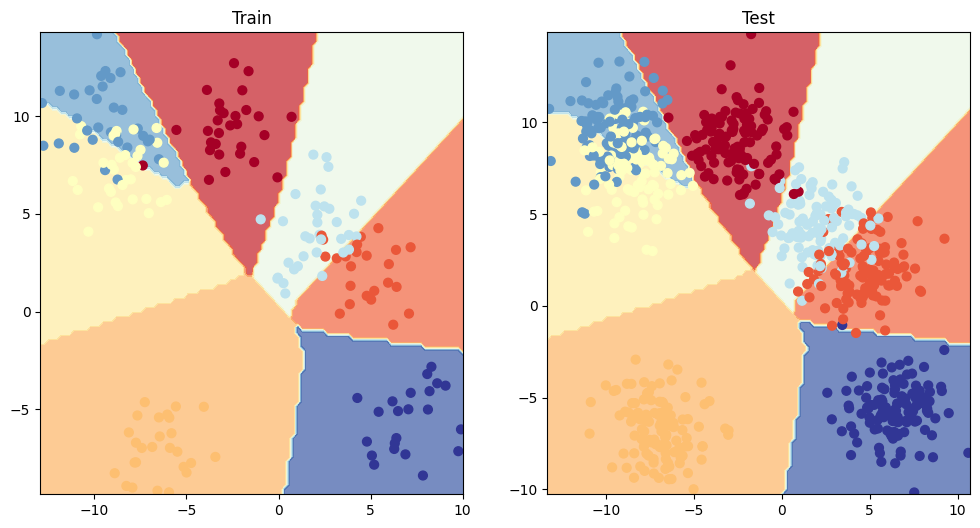

In [79]:
from helper_functions import plot_predictions, plot_decision_boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(mul_model_0, blob_train_data, blob_train_label)

plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(mul_model_0, blob_test_data, blob_test_label)

## 7. A few more classification metrics

* Accuracy - out of 100 samples, how many does the model predict right
* Precison
* Recall
* f1 score
* Confusion matrix
* Classification report

In Pytorch, using torchMetrics (need to install package)

In [82]:
!pip install torchmetrics

You should consider upgrading via the 'd:\work\personal-projects\pytorch-nlp\pytorch\scripts\python.exe -m pip install --upgrade pip' command.


In [85]:
from torchmetrics import Accuracy

torchmretrics_accuracy = Accuracy(task = 'multiclass',num_classes=7).to(device)
torchmretrics_accuracy(val_pred, blob_test_label)

tensor(0.8550, device='cuda:0')